In [1]:
import os
import warnings
import numpy as np
from math import sqrt
import matplotlib.pyplot as plt
import deepxde as dde

2024-12-04 23:11:04.648713: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: SSE4.1 SSE4.2, in other operations, rebuild TensorFlow with the appropriate compiler flags.
Using backend: tensorflow.compat.v1
Other supported backends: tensorflow, pytorch, jax, paddle.
paddle supports more examples now and is recommended.


Instructions for updating:
non-resource variables are not supported in the long term



Compiling model...
Building feed-forward neural network...
'build' took 0.042380 s

'compile' took 0.211932 s

INFO:tensorflow:Restoring parameters from model1-10000.ckpt
Training model...

Step      Train loss              Test loss               Test metric   
0         [3.98e+00, 1.03e+00]    [4.01e+00, 1.03e+00]    [1.03e+00]    


2024-12-04 23:11:18.863588: I tensorflow/compiler/mlir/mlir_graph_optimization_pass.cc:353] MLIR V1 optimization pass is not enabled
2024-12-04 23:11:18.888824: W tensorflow/c/c_api.cc:300] Operation '{name:'dense_3/bias/Adam_1/Assign' id:666 op device:{requested: '', assigned: ''} def:{{{node dense_3/bias/Adam_1/Assign}} = AssignVariableOp[_has_manual_control_dependencies=true, dtype=DT_FLOAT, validate_shape=false](dense_3/bias/Adam_1, dense_3/bias/Adam_1/Initializer/zeros)}}' was changed by setting attribute after it was run by a session. This mutation will have no effect, and will trigger an error in the future. Either don't modify nodes after running them or create a new session.


1000      [1.01e-04, 1.77e-08]    [9.23e-05, 1.77e-08]    [8.35e-04]    
2000      [3.54e-05, 6.07e-09]    [3.33e-05, 6.07e-09]    [3.75e-04]    
3000      [3.08e-05, 3.86e-04]    [3.21e-05, 3.86e-04]    [2.74e-02]    
4000      [1.53e-05, 1.53e-05]    [1.51e-05, 1.53e-05]    [5.44e-03]    
5000      [9.71e-06, 3.34e-09]    [8.90e-06, 3.34e-09]    [1.74e-04]    
6000      [6.66e-06, 3.75e-05]    [5.72e-06, 3.75e-05]    [1.20e-02]    
7000      [3.57e-06, 7.21e-08]    [2.88e-06, 7.21e-08]    [5.83e-04]    
8000      [2.36e-06, 1.61e-09]    [1.92e-06, 1.61e-09]    [9.60e-05]    
9000      [1.97e-06, 7.57e-10]    [1.69e-06, 7.57e-10]    [7.57e-05]    
10000     [7.24e-05, 1.11e-03]    [7.74e-05, 1.11e-03]    [5.07e-02]    

Best model at step 9000:
  train loss: 1.97e-06
  test loss: 1.69e-06
  test metric: [7.57e-05]

'train' took 3.986555 s

Saving loss history to /Users/lixinyue/Desktop/Fall 2024/S&DS 689/project/loss.dat ...
Saving training data to /Users/lixinyue/Desktop/Fall 2024/S&

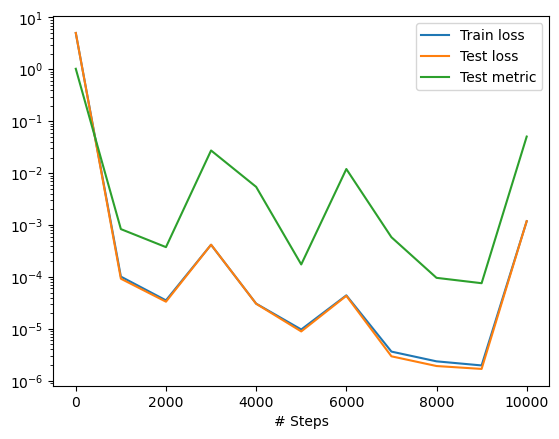

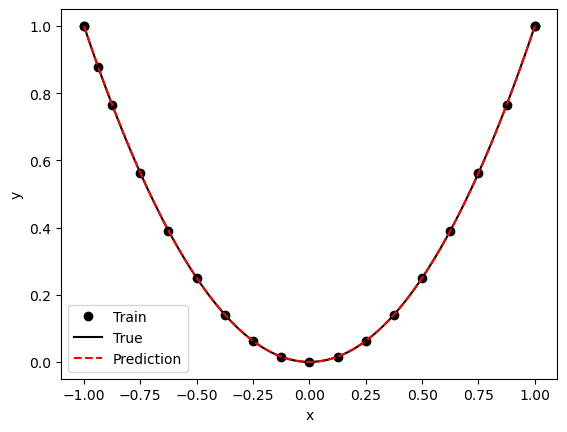

In [2]:
def pde(x, y):
    dy_xx = dde.grad.hessian(y, x)
    return dy_xx - 2

def boundary_new(x, on_boundary):
    return on_boundary


def func_new(x):
    return x**2


geom_new = dde.geometry.Interval(-1, 1)
bc_new = dde.icbc.DirichletBC(geom_new, func_new, boundary_new)
data_new = dde.data.PDE(
    geom_new, pde, [bc_new], 16, 2, solution=func_new, num_test=100
)

layer_size = [1] + [50] * 3 + [1]
activation = "tanh"
initializer = "Glorot uniform"
net = dde.nn.FNN(layer_size, activation, initializer)

model = dde.Model(data_new, net)
model.compile("adam", lr=0.001, metrics=["l2 relative error"])
model.restore('model1-10000.ckpt')  # Load the pre-trained model
losshistory, train_state = model.train(iterations=10000)

dde.saveplot(losshistory, train_state, issave=True, isplot=True)